# Задача 2: аппроксимация функции

# Шаг 1:
Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?


In [0]:
import math

In [0]:
def f(x):
    return math.sin(x / 5.0) * math.exp(x / 10.0) + 5 * math.exp(-x / 2.0)

In [0]:
import numpy as np
from numpy.linalg import inv

In [0]:
x = np.array([1, 15])
y = map(f, x)

In [0]:
x_exp = np.expand_dims(x, axis = 1)
ones = np.expand_dims(np.ones(len(x_exp)), axis = 1)
x_exp = np.concatenate((ones, x_exp), axis=1)
x_exp

array([[ 1.,  1.],
       [ 1., 15.]])

In [0]:
from scipy.linalg import solve

In [0]:
w = solve(x_exp, y)

In [0]:
def f_inter(x):
  return w[0] + x * w[1]

In [0]:
%matplotlib inline
from matplotlib import pylab as plt

In [0]:
x = np.arange(0, 16, 0.1)
y = map(f,x)
y_inter = f_inter(x)

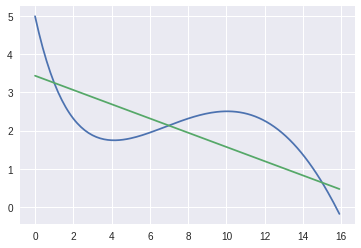

In [0]:
plt.plot(x, y, '-', x, y_inter)
plt.show()

## Шаг 2:
Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

In [0]:
x = np.array([1, 8, 15])
y = map(f, x)

In [0]:
x_exp = np.expand_dims(x, axis = 1)
squares = x ** 2
squares = np.expand_dims(squares, axis = 1)
ones = np.expand_dims(np.ones(len(x_exp)), axis = 1)
x_exp = np.concatenate((ones, x_exp), axis=1)
x_exp = np.concatenate((x_exp, squares), axis=1)
x_exp

array([[  1.,   1.,   1.],
       [  1.,   8.,  64.],
       [  1.,  15., 225.]])

In [0]:
w = solve(x_exp, y)

In [0]:
def f_inter(x):
  return w[0] + x * w[1] + (x ** 2) * w[2]

In [0]:
x = np.arange(0, 16, 0.1)
y = map(f,x)
y_inter = f_inter(x)

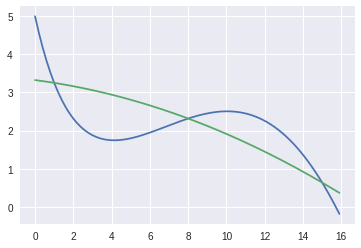

In [0]:
plt.plot(x, y, '-', x, y_inter)
plt.show()

## Шаг 3:
Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

In [0]:
x = np.array([1, 4, 10, 15])
y = map(f, x)

In [0]:
x_exp = np.expand_dims(x, axis = 1)
ones = np.expand_dims(np.ones(len(x_exp)), axis = 1)
squares = x ** 2
squares = np.expand_dims(squares, axis = 1)
cubes = x ** 3
cubes = np.expand_dims(cubes, axis = 1)
x_exp = np.concatenate((ones, x_exp), axis=1)
x_exp = np.concatenate((x_exp, squares), axis=1)
x_exp = np.concatenate((x_exp, cubes), axis=1)
x_exp

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03],
       [1.000e+00, 1.500e+01, 2.250e+02, 3.375e+03]])

In [0]:
w = solve(x_exp, y)

In [0]:
def f_inter(x):
  return w[0] + x * w[1] + (x ** 2) * w[2] + (x ** 3) * w[3]

In [0]:
x = np.arange(0, 16, 0.1)
y = map(f,x)
y_inter = f_inter(x)

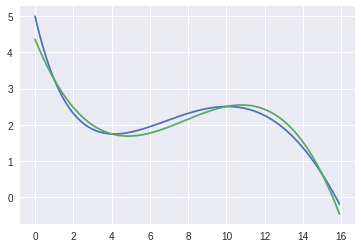

In [0]:
plt.plot(x, y, '-', x, y_inter)
plt.show()

In [0]:
with open('function_approximations_result.txt', 'w') as file_res:
    file_res.write(str(w[0]) + ' ' + str(w[1]) + ' ' + str(w[2]) + ' ' + str(w[3]))

In [0]:
!more function_approximations_result.txt

4.3626415351180725 -1.2955258656948443 0.19333684702151174 -0.00823565117332056


In [0]:
from google.colab import files
files.download('function_approximations_result.txt')

OSError: ignored